In [1]:
import pandas as pd 
df = pd.read_csv('../data/model_input.csv')

In [2]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())
df.describe()
df.head()


(2341554, 6)
gender_encoded            int64
age_group_encoded         int64
severity_encoded          int64
admission_encoded         int64
payment_type_encoded      int64
total_charges           float64
dtype: object
gender_encoded          0
age_group_encoded       0
severity_encoded        0
admission_encoded       0
payment_type_encoded    0
total_charges           0
dtype: int64


,gender_encoded,age_group_encoded,severity_encoded,admission_encoded,payment_type_encoded,total_charges
0,0,3,3,3,3,37094.14
1,0,4,1,1,2,18864.80
2,0,4,2,3,2,54075.27
3,1,4,3,3,2,34920.03
4,0,3,1,3,2,12820.52


#### **Define Features & Target:**

In [3]:
X = df.drop('total_charges', axis=1) # --> Features
y = df['total_charges'] # --> Target

#### **Train-test split:**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Linear Regression Model:

In [5]:
from sklearn.linear_model import LinearRegression

# 1. Initalize the model 
model = LinearRegression()

# 2. Train the model using training data 
model.fit(X_train, y_train)

LinearRegression()

#### **Make Predictions on the Test Set:**

In [6]:
y_pred = model.predict(X_test)

#### **Evaluate the Model’s Performance:**

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (average squared difference between actual & predicted)
mse = mean_squared_error(y_test, y_pred)

# R² Score (how much variance in y is explained by X)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 5024071221.36
R² Score: 0.1236


#### **Check Feature Importance:**

In [8]:
# View model coefficients for each feature
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.2f}")

gender_encoded: 4977.96
age_group_encoded: 3318.59
severity_encoded: 28993.67
admission_encoded: -6929.99
payment_type_encoded: 775.45


**Coefficient Analysis:**

- Positive coefficients increase total charges
- Negative coefficients decrease them
- Use this to spot which features matter

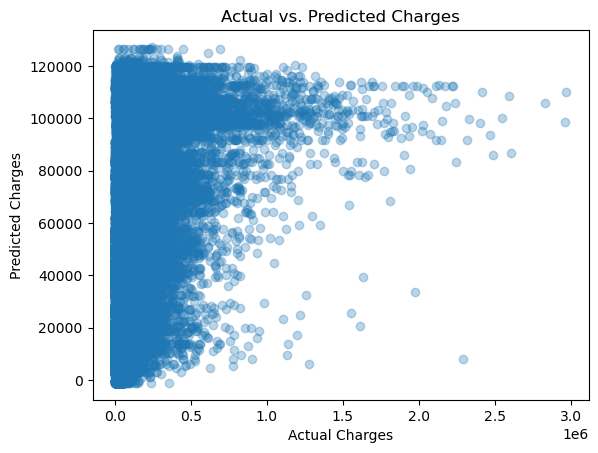

In [9]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted charges
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

### **Interpretation:**

Most predictions fall within a narrow range (under $125K), while actual charges span up to $3 million. This shows the model struggles with high-cost outliers and tends to underpredict for expensive cases. It likely needs more informative features to capture the true drivers of total charges.

## Random Forest Regressor:

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 